### Алгоритм k-means

Алгоритм k-средних (k-means, быстрый кластерный анализ) – наиболее популярный метод среди неиерархических методов кластерного анализа. 

В отличие от иерархических методов, которые не требуют предварительных предположений о числе кластеров, для использования k-means необходимо иметь гипотезу о наиболее вероятном количестве кластеров.

Алгоритм k-средних – итерационная процедура, которую можно описать следующими шагами:  
    
1. Выбирается число кластеров k.   
2. Выбраются k точек, находящихся, вероятно, в разных кластерах, и они объявляются начальными центрами кластеров.
3. Для каждого наблюдения определяется ближайший центр кластера. Наблюдения, ближайшие к центрам, образуют начальные кластеры.  
Для того, чтобы сравнивать два объекта, необходимо иметь критерий, на основании которого будет происходить сравнение. Таким критерием является расстояние между объектами. В  методе k-means используется только евклидово расстояние.
4. Вычисляются центроиды – центры тяжести кластеров. Каждый центроид – это вектор, элементы которого представляют собой средние значения соответствующих признаков, вычисленные по всем наблюдениям в кластере. Центр кластера смещается в его центроид и центроид становится центром нового кластера.
5. 3-й и 4-й шаги итеративно повторяются. На каждой итерации происходит изменение границ кластеров и смещение их центров. В результате минимизируется расстояние между элементами внутри кластеров, и увеличиваются межкластерные расстояния.  

Остановка алгоритма происходит тогда, когда границы кластеров и расположения центроидов перестают изменяться от итерации к итерации, т.е. на каждой итерации в каждом кластере остается один и тот же набор наблюдений.

![img](https://drek4537l1klr.cloudfront.net/rhys/Figures/fig16-1_alt.jpg)

Примеры:
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Метод k-means эффективно работает, когда кластеры представляют собой значительно разделенные между собой компактные «облака». Он хорошо подходит для обработки больших объемов данных, но не применим для обнаружения кластеров невыпуклой формы или сильно различающегося размера. Также, метод очень чувствителен к шуму и обособленным точкам.

#### Как выбрать число кластеров?  
При кластеризации методом k-средних количество кластеров чаще всего оценивают с помощью метода «локтя». Метод «локтя» заключается в циклическом запуске алгоритма с последовательно увеличивающимся количеством кластеров. Полученный результат отображается на графике: по оси Ox откладывается количество кластеров, а по оси Oy критерий качества алгоритма k-means. По графику можно видеть, что в какой-то момент разрыв между точками резко уменьшается. Это и есть «локоть». Количество кластеров, соответствующих «локтю» принято считать оптимальным. Сложность данного метода заключается в том, что «локоть» не всегда легко однозначно идентифицировать.

![img](https://lh6.googleusercontent.com/kZoSDF1kR4FtPAwGB4tz4W0K3Yx6Ujibpru76ekIE0QGdAVPTWCAWWS8YygTzh0UZ_ZoGUVaO-KdTltAqCQzvAEDX3PXEGjlSpNcqL9HJIMPhrOaeZmKhHPdUWGGN37gdCjQr1SK)

В Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  

Параметры:
- n_clusters – количество кластеров. 
- init – способ инициализации центроидов (по умолчанию ‘k-means++’).
- n_init – количество запусков алгоритма со случайной инициализацией центроидов (по умолчанию n_init = 10).
- random_state – определяет случайность инициализации центроида.


Атрибуты:
- cluster_centers_ – координаты центров кластеров.
- labels_ – возвращает метки кластеров.
- inertia_ – сумма квадратов расстояний наблюдений до ближайшего центра кластера.

#### Пример
В файле mobile.xlsx находятся данные об абонентах телекоммуникационной
компании.  
Целью исследования является сегментация абонентской базы для разработки
новых тарифов и проведения маркетинговых акций.

In [1]:
import pandas as pd
df = pd.read_excel('mobile.xlsx')
df

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
0,56,82,121.54
1,1,221,287.51
2,36,68,113.70
3,23,96,410.23
4,29,139,537.60
...,...,...,...
4487,30,66,186.20
4488,23,112,500.68
4489,5,189,470.42
4490,69,124,858.99


In [2]:
df.describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход
count,4492.000000,4492.000000,4492.000000
mean,21.243321,140.480632,506.155512
std,27.911864,91.742992,646.252023
min,0.000000,2.000000,3.180000
25%,3.000000,94.000000,152.880000
50%,6.000000,129.000000,316.960000
75%,32.000000,168.000000,600.032500
max,179.000000,635.000000,5142.760000


Кластеризация методом k-means

In [3]:
# Импортируем k-means из библиотеки Scikit-learn
from sklearn.cluster import KMeans

# Создаем экземпляр класса k-means
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)

# Обучаем агоритм на данных с помощью метода fit
kmeans.fit(df)

# Записываем номера кластеров в новый столбец
df['Кластер'] = kmeans.labels_
df.head()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
0,56,82,121.54,0
1,1,221,287.51,0
2,36,68,113.70,0
3,23,96,410.23,0
4,29,139,537.60,0


Метод локтя

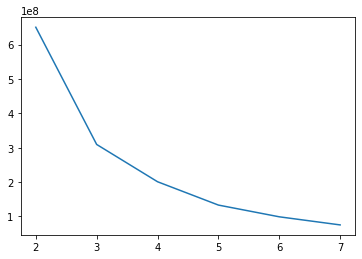

In [4]:
# Создадим список, в который будем записывать значение критерия качества k-means
criterion = []
# Количество кластеров будем изменять от 2 до 7
for k in range(2,8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    criterion.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2,8), criterion)

Визуализация кластеров

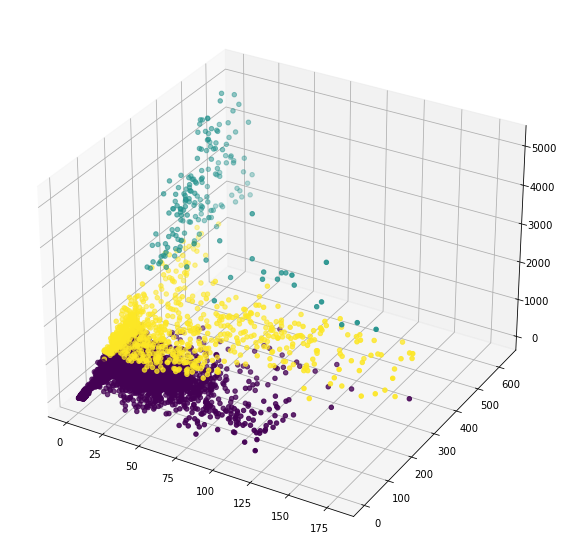

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
x = np.array(df['Количество SMS за месяц'])
y = np.array(df['Количество звонков'])
z = np.array(df['Среднемесячный расход'])

ax.scatter(x,y,z, c=df['Кластер'])

plt.show()

In [6]:
df.loc[df['Кластер']==0].describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
count,3398.000000,3398.000000,3398.000000,3398.0
mean,18.584461,110.258976,248.771186,0.0
std,23.542365,55.851474,167.348175,0.0
min,0.000000,2.000000,3.180000,0.0
25%,2.000000,81.000000,112.012500,0.0
50%,5.000000,115.000000,232.330000,0.0
75%,30.000000,145.000000,373.765000,0.0
max,179.000000,398.000000,612.960000,0.0


In [7]:
df.loc[df['Кластер']==1].describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
count,176.000000,176.000000,176.000000,176.0
mean,16.892045,427.744318,3082.744432,1.0
std,28.856982,105.629203,767.708530,0.0
min,0.000000,196.000000,2019.740000,1.0
25%,5.000000,344.000000,2407.332500,1.0
50%,9.000000,428.000000,2991.510000,1.0
75%,12.000000,508.250000,3555.195000,1.0
max,160.000000,635.000000,5142.760000,1.0


In [8]:
df.loc[df['Кластер']==2].describe()

,Количество SMS за месяц,Количество звонков,Среднемесячный расход,Кластер
count,918.00000,918.000000,918.000000,918.0
mean,31.91939,197.272331,964.883497,2.0
std,38.20304,71.306868,314.395836,0.0
min,0.00000,82.000000,594.050000,2.0
25%,4.00000,143.250000,721.085000,2.0
50%,15.00000,181.500000,865.305000,2.0
75%,49.75000,240.750000,1128.467500,2.0
max,178.00000,511.000000,2011.790000,2.0
